In [1]:
import scipy
import numpy as np

In [2]:
from scipy.stats import binom

In [3]:
![](http://www.stat.yale.edu/Courses/1997-98/101/binpdf.gif)

'[]' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
import pandas as pd
import numpy as np
import math
import scipy
from scipy import stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt

In [5]:
data = pd.DataFrame({'Black Board': {0: 4, 1: 3, 2: 2}, 
                   'Case Presentation': {0: 2, 1: 4, 2: 6}, 
                   'PPT': {0: 2, 1: 1, 2: 3}}) 
data

,Black Board,Case Presentation,PPT
0,4,2,2
1,3,4,1
2,2,6,3


In [6]:
#normal anova
datanew=pd.melt(data, id_vars=['Black Board'], value_vars=['Case Presentation','PPT'])
print(datanew)

   Black Board           variable  value
0            4  Case Presentation      2
1            3  Case Presentation      4
2            2  Case Presentation      6
3            4                PPT      2
4            3                PPT      1
5            2                PPT      3


In [7]:
datanew.columns=['index','treatments','value']

In [8]:
datanew

,index,treatments,value
0,4,Case Presentation,2
1,3,Case Presentation,4
2,2,Case Presentation,6
3,4,PPT,2
4,3,PPT,1
5,2,PPT,3


In [9]:
model=ols('value~C(treatments)',data=datanew).fit()

In [10]:
model.summary()

C:\Users\prash\AppData\Roaming\Python\Python310\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     2.400
Date:                Tue, 27 Aug 2024   Prob (F-statistic):              0.196
Time:                        12:16:47   Log-Likelihood:                -10.046
No. Observations:                   6   AIC:                             24.09
Df Residuals:                       4   BIC:                             23.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.0000      0.913      4.382      0.012       1.465       6.535
C(treatments)[T.PPT]    -2.0000      1.291     -1.549      0.196      -5.584       1.584
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.700
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.230
Skew:                          -0.000   Prob(JB):                        0.891
Kurtosis:                       2.040   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
anova_table=sm.stats.anova_lm(model,type=1)

In [12]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),1.0,6.0,6.0,2.4,0.196261
Residual,4.0,10.0,2.5,NaN,NaN


In [14]:
#rbd
datanew=pd.melt(data, id_vars=['Black Board'], value_vars=['Case Presentation','PPT'])
print(datanew)

   Black Board           variable  value
0            4  Case Presentation      2
1            3  Case Presentation      4
2            2  Case Presentation      6
3            4                PPT      2
4            3                PPT      1
5            2                PPT      3


In [15]:
datanew.columns=['blocks','treatments','value']

In [16]:
model=ols('value~C(blocks)+C(treatments)',data=datanew).fit()

In [17]:
anova_table=sm.stats.anova_lm(model,type=1)

In [18]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(blocks),2.0,7.0,3.5,2.333333,0.300000
C(treatments),1.0,6.0,6.0,4.000000,0.183503
Residual,2.0,3.0,1.5,NaN,NaN


In [19]:
data=pd.read_excel('mooc data analysis\Twoway.xlsx')

In [20]:
data

,Value,prep_pro,college
0,500,three_hr,Business
1,580,three_hr,Business
2,540,three_hr,Engineering
3,460,three_hr,Engineering
4,480,three_hr,Artsandscience
5,400,three_hr,Artsandscience
6,460,One-day,Business
7,540,One-day,Business
8,560,One-day,Engineering
9,620,One-day,Engineering


In [21]:
model=ols('Value~C(college)+C(prep_pro)+C(college):C(prep_pro)',data).fit()

In [22]:
model.summary()

C:\Users\prash\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     3.548
Date:                Tue, 27 Aug 2024   Prob (F-statistic):             0.0384
Time:                        12:18:03   Log-Likelihood:                -88.591
No. Observations:                  18   AIC:                             195.2
Df Residuals:                       9   BIC:                             203.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                           445.0000     33.208     13.400      0.000     369.878     520.122
C(college)[T.Business]                              135.0000     46.963      2.875      0.018      28.762     241.238
C(college)[T.Engineering]                           145.0000     46.963      3.088      0.013      38.762     251.238
C(prep_pro)[T.One-day]                                5.0000     46.963      0.106      0.918    -101.238     111.238
C(prep_pro)[T.three_hr]                              -5.0000     46.963     -0.106      0.918    -111.238     101.238
C(college)[T.Business]:C(prep_pro)[T.One-day]       -85.0000     66.416     -1.280      0.233    -235.244      65.244
C(college)[T.Engineering]:C(prep_pro)[T.One-day]     -5.0000     66.416     -0.075      0.942    -155.244     145.244
C(college)[T.Business]:C(prep_pro)[T.three_hr]      -35.0000     66.416     -0.527      0.611    -185.244     115.244
C(college)[T.Engineering]:C(prep_pro)[T.three_hr]   -85.0000     66.416     -1.280      0.233    -235.244      65.244
==============================================================================
Omnibus:                       16.430   Durbin-Watson:                   2.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                2.333
Skew:                           0.000   Prob(JB):                        0.311
Kurtosis:                       1.236   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
anova_table=sm.stats.anova_lm(model,type=2)

In [24]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(college),2.0,45300.0,22650.000000,10.269521,0.004757
C(prep_pro),2.0,6100.0,3050.000000,1.382872,0.299436
C(college):C(prep_pro),4.0,11200.0,2800.000000,1.269521,0.350328
Residual,9.0,19850.0,2205.555556,NaN,NaN


In [28]:
#linear regression 1
data=pd.read_excel('E:\DA with Python\mooc data analysis/reg2.xlsx')

In [29]:
data

,Hydrocarbon level,O2
0,0.99,90.01
1,1.02,89.05
2,1.15,91.43
3,1.29,93.74
4,1.46,96.73
5,1.36,94.45
6,0.87,87.59
7,1.23,91.77
8,1.55,99.42
9,1.40,93.65


In [32]:
#plot at mean of x and y
import seaborn as sns
x=data['Hydrocarbon level']
y=data['O2']
plt.figure()
sns.regplot(x,y,fit_reg=False)
plt.scatter(np.mean(x),np.mean(y),color="green")

TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 640x480 with 0 Axes>

In [33]:
#simple linear reg
data=pd.read_excel('mooc data analysis/regr.xlsx')

In [34]:
data

,TV Ads,car Sold
0,1,14
1,3,24
2,2,18
3,1,17
4,3,27


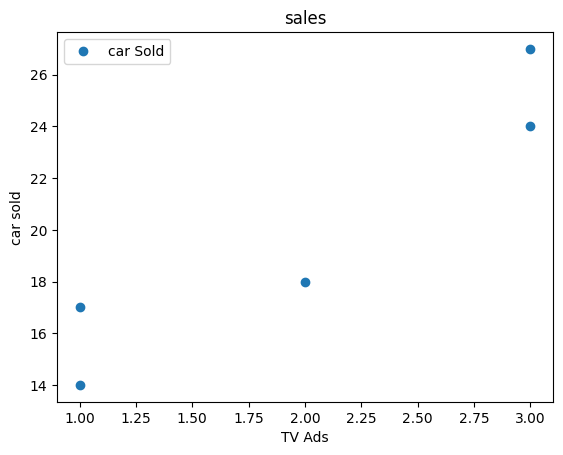

In [35]:
data.plot('TV Ads','car Sold',style='o')
plt.ylabel('car sold')
plt.title('sales')
plt.show()

In [36]:
t=data['TV Ads']
c=data['car Sold']
import statsmodels.api as s
t=s.add_constant(t)
model1=sm.OLS(c,t)
result1=model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:               car Sold   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     21.43
Date:                Tue, 27 Aug 2024   Prob (F-statistic):             0.0190
Time:                        12:21:47   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000      2.366      4.226      0.0

C:\Users\prash\AppData\Roaming\Python\Python310\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [38]:
#training and testing model
data=pd.read_excel('mooc data analysis\HARDNESS.xls')
data

,Tensile strength,Hardness
0,53.0,29.31
1,70.2,34.86
2,84.3,36.82
3,55.3,30.12
4,78.5,34.02
5,63.5,30.82
6,71.4,35.40
7,53.4,31.26
8,82.5,32.18
9,67.3,33.42


In [39]:
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [40]:
x=data['Hardness'].values.reshape(-1,1)
y=data['Tensile strength'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=88)
x_train

array([[38.02],
       [34.76],
       [32.18],
       [29.31],
       [23.69],
       [30.12],
       [27.65],
       [29.25],
       [35.4 ],
       [27.99],
       [28.67],
       [31.26],
       [34.02],
       [34.88],
       [29.25],
       [36.82],
       [34.47],
       [24.66],
       [28.71],
       [25.81],
       [34.86],
       [30.82],
       [25.77],
       [37.69],
       [26.46],
       [25.68],
       [31.85],
       [23.21]])

In [41]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((28, 1), (7, 1), (28, 1), (7, 1))

In [42]:
len(x_train)

28

In [43]:
len(x_test)

7

In [44]:
x_train

array([[38.02],
       [34.76],
       [32.18],
       [29.31],
       [23.69],
       [30.12],
       [27.65],
       [29.25],
       [35.4 ],
       [27.99],
       [28.67],
       [31.26],
       [34.02],
       [34.88],
       [29.25],
       [36.82],
       [34.47],
       [24.66],
       [28.71],
       [25.81],
       [34.86],
       [30.82],
       [25.77],
       [37.69],
       [26.46],
       [25.68],
       [31.85],
       [23.21]])

In [45]:

#constructing reg model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [46]:
reg.fit(x_train,y_train)

LinearRegression()

In [47]:
reg.intercept_[0]

7.045691001423386

In [48]:
reg.coef_[0][0]

1.9977740102197983

In [49]:
y_predict=reg.predict(x_test)
y_predict

array([[73.81129842],
       [56.27084261],
       [64.28191639],
       [66.63928973],
       [70.37512713],
       [74.97000735],
       [71.73361345]])

In [50]:
mean_squared_error(y_test,y_predict)

35.71053398209997

In [51]:
reg.score(x_test,y_test)

0.5362243730094254

In [52]:
reg.score(x_train,y_train)

0.4500146647765303